# 13wk-48: 아이스크림 / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

[???](???)

# 2. Imports

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
#---#
import pickle
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [26]:
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
np.random.seed(43052)
eps = np.random.randn(100)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 
df_train = pd.DataFrame({'temp':temp,'sales':icecream_sales})
df_train = TabularDataset(df_train)

# 4. 적합

## A. 맨날 쓰는 코드

In [68]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label = 'sales')
# step3 
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_184003/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231130_184003/"
AutoGluon Version:  0.8.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   1585.66 GB / 1887.51 GB (84.0%)
Train Data Rows:    100
Train Data Columns: 1
Label Column: sales
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
    Label info (max, min, mean, stddev): (61.561043278721556, 10.90026146402572, 33.97342, 10.63375)
    If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting

[1000]  valid_set's rmse: 5.45375
[2000]  valid_set's rmse: 5.40245

## B. 적합결과 시각화

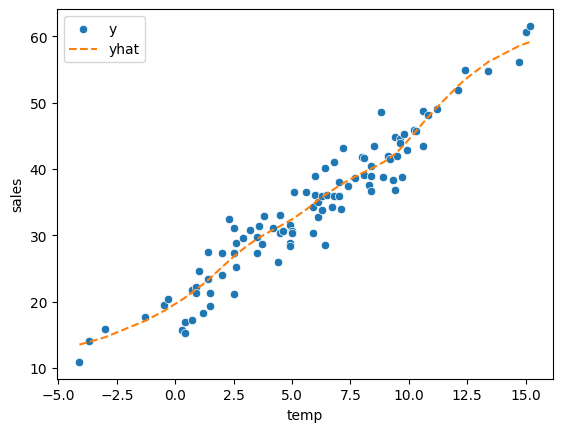

In [69]:
sns.scatterplot(df_train, x='temp',y='sales',label='y')
sns.lineplot(df_train, x='temp',y=yhat,color='C1',linestyle='--',label='yhat')
plt.legend()

-   잘맞춘다?

## C. 모형들 확인

In [70]:
predictr.leaderboard(silent=True)

## D. 최강모형의 `r2_score` 계산

`-` `r2_score` 계산 – 방법1

In [75]:
_y = df_train.sales
_yhat = predictr.predict(df_train) 
sklearn.metrics.r2_score(_y,yhat)

`-` `r2_score` 계산 – 방법2

In [76]:
_y = df_train.sales 
_yhat = predictr.predict(df_train,model='NeuralNetTorch')
sklearn.metrics.r2_score(_y,_yhat)

## E. 특정모형의 적합값 구경

`-` XGBoost 궁금해..

In [77]:
_y = df_train.sales 
_yhat = predictr.predict(df_train, model='XGBoost')
sklearn.metrics.r2_score(_y,_yhat)

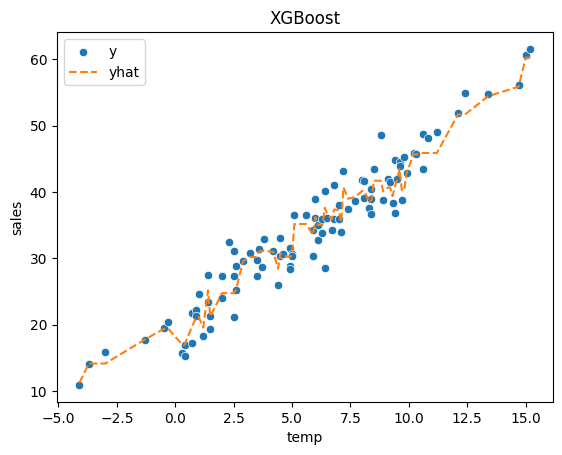

In [78]:
sns.scatterplot(df_train, x='temp',y='sales',color='C0',label='y')
plt.plot(df_train.temp,_yhat,'--',color='C1',label='yhat')
ax = plt.gca()
ax.set_title("XGBoost")
plt.legend()